## Support Vector Machine (SVM)

SVM (Support Vector Machine) is a classification algorithm that finds the optimal boundary (hyperplane) to separate different classes. It is useful when data is high-dimensional and works well even when classes are not linearly separable.

### Finding the Optimal Hyperplane

SVM finds a hyperplane that best separates two classes while maximizing the margin, which is the distance between the hyperplane and the closest points from each class, called support vectors.

For a dataset with two features like age and fare, the hyperplane is a line that separates survivors from non-survivors.


### Handling Non-Linearly Separable Data

If data is not linearly separable, SVM applies a kernel trick to transform it into a higher-dimensional space where separation is possible.

Examples of kernels:

- Linear Kernel works for simple separable data.
- Polynomial Kernel maps features to higher dimensions.
- RBF Kernel creates complex boundaries for non-linearly separable data.

![alt text](<svm_kernel.png>)
### Using Soft Margin with the C Parameter

If data is noisy, SVM allows some misclassifications using a soft margin, which is controlled by the C parameter.

- High C results in fewer misclassifications but may overfit.
- Low C allows more misclassification for better generalization.

## Toy Dataset

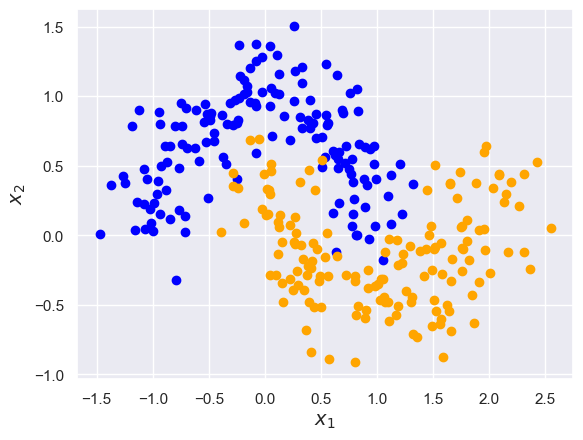

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set(style='darkgrid')

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
plt.plot(X[y==0, 0], X[y==0, 1], "o", color='blue') 
plt.plot(X[y==1, 0], X[y==1, 1], "o", color='orange')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

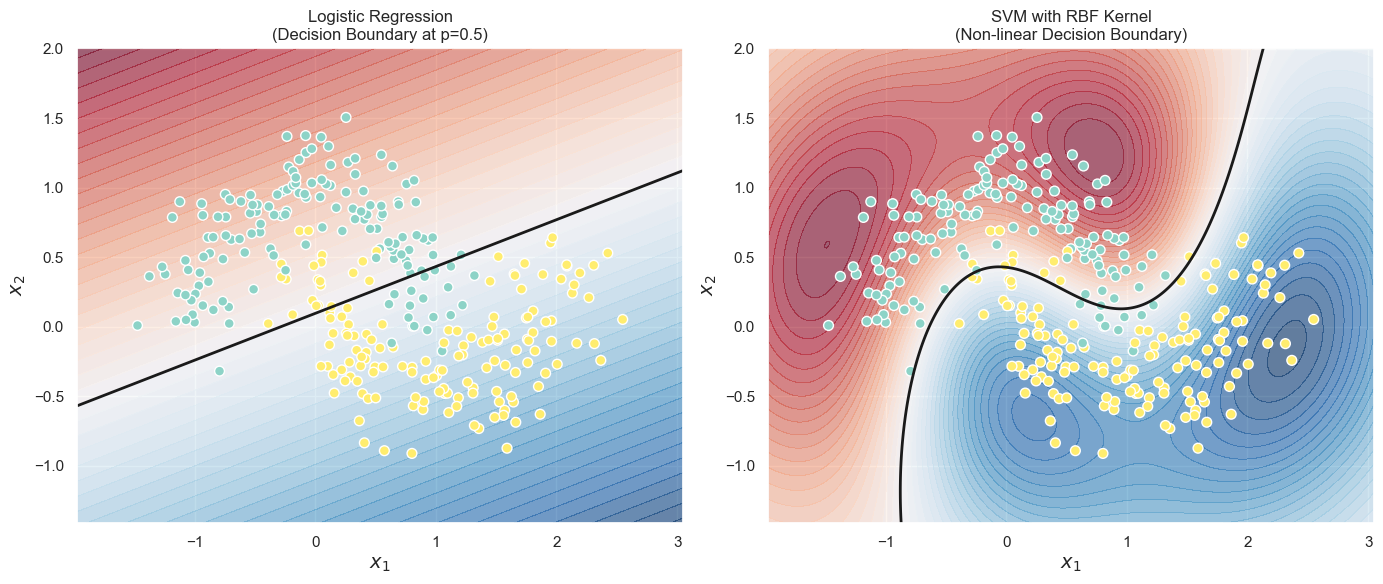

In [4]:
# Fit Logistic Regression (linear decision boundary)
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Fit SVM with RBF kernel (non-linear decision boundary)
svm_clf = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_clf.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute decision functions for each classifier
log_decision = log_reg.decision_function(grid).reshape(xx.shape)
svm_decision = svm_clf.decision_function(grid).reshape(xx.shape)

# Set up figure with two subplots: one for logistic regression and one for SVM.
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 6))

# Plot decision function contours for logistic regression
cs0 = ax0.contourf(xx, yy, log_decision, levels=50, cmap=plt.cm.RdBu, alpha=0.6)
# Plot the decision boundary where the decision function equals 0 (p=0.5)
ax0.contour(xx, yy, log_decision, levels=[0], colors='k', linewidths=2, linestyles='solid')

# Scatter plot of the samples with Set3 colormap for clear class separation
scatter0 = ax0.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set3, edgecolors='white', s=50)
ax0.set_title('Logistic Regression\n(Decision Boundary at p=0.5)')
ax0.set_xlabel('$x_1$', fontsize=14)
ax0.set_ylabel('$x_2$', fontsize=14)

cs1 = ax1.contourf(xx, yy, svm_decision, levels=50, cmap=plt.cm.RdBu, alpha=0.6)
ax1.contour(xx, yy, svm_decision, levels=[0], colors='k', linewidths=2, linestyles='solid')
scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set3, edgecolors='white', s=50)
ax1.set_title('SVM with RBF Kernel\n(Non-linear Decision Boundary)')
ax1.set_xlabel('$x_1$', fontsize=14)
ax1.set_ylabel('$x_2$', fontsize=14)
plt.tight_layout()
plt.show()


## Training SVM on Titanic Dataset

Using the Titanic dataset, train an SVM classifier to predict survival.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

file_path = "../Datasets/Titanic_dataset_train.csv"
df = pd.read_csv(file_path)

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.drop(columns=["Cabin"], inplace=True)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

features = ["Pclass", "Sex", "Age", "Fare", "SibSp",  "Parch", "Embarked_S", "Embarked_Q"]

X = df[features]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train SVM classifier with RBF kernel
svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", report_svm)

SVM Accuracy: 0.6536
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



## Normalization Importance

### Understanding Key Parameters in SVM

- `kernel` determines the type of decision boundary. Options include `linear`, `polynomial`, and `RBF`.
- `C` controls the margin. A high value makes the model strict with fewer misclassifications, while a low value allows more misclassifications for better generalization.
- `gamma` is used in non-linear kernels to define the influence of each training point.

### Comparison of SVM with Decision Tree and Random Forest

| Feature                  | SVM                     | Decision Tree          | Random Forest         |
|--------------------------|------------------------|------------------------|------------------------|
| Works with Non-Linear Data | Yes (with kernel trick) | No                     | Yes                    |
| Feature Scaling Needed   | Yes                     | No                     | No                     |
| Handles Large Datasets   | No (slower)             | Yes                    | Yes                    |
| Overfitting Risk         | High (if C is too high) | High (if deep)         | Low                    |
| Interpretability         | Low                     | High                   | Medium                 |
| Speed on Large Data      | Slow                    | Fast                   | Fast                   |

### Comparison of SVM with Logistic Regression

SVM and Logistic Regression are both used for binary classification and attempt to separate two classes, but they work differently.

| Feature                  | SVM                     | Logistic Regression    |
|--------------------------|------------------------|------------------------|
| Decision Boundary        | Can be linear or non-linear | Always linear        |
| Works with Non-Linearity | Yes (with kernel trick) | No                     |
| Feature Scaling Needed   | Yes                     | Yes                    |
| Handles Large Datasets   | No (slower)             | Yes                    |
| Sensitivity to Outliers  | High                    | Moderate               |
| Probability Outputs      | No                      | Yes (predicts probabilities) |

Logistic Regression always finds a linear decision boundary, while SVM can find non-linear boundaries using kernels. SVM is more flexible but computationally expensive for large datasets. Logistic Regression is faster and provides probability scores, which makes it useful when estimating uncertainty in predictions.

### Conclusion

SVM is a powerful model for classification, especially when data is not linearly separable. It works best with proper feature scaling. It is slower on large datasets compared to decision trees and random forests. Choosing the right kernel and hyperparameters is crucial for good performance.

SVM is a good choice for small datasets where complex decision boundaries are needed. Logistic Regression is more efficient when working with large datasets and when interpretability is important.

In [9]:
# Scale features (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Initialize and train SVM classifier with RBF kernel
svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm.fit(X_train_scale, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test_scale)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", report_svm)

SVM Accuracy: 0.8212
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## Why Scaling Matters for SVM

Support Vector Machine (SVM) is sensitive to feature scaling because it uses distance-based calculations to determine the optimal decision boundary (hyperplane). If features have very different scales, some features may dominate others, affecting the model's performance.

### Example: Titanic Dataset Features

Consider the two features in the Titanic dataset:
- **Age**: Ranges from around 0 to 80.
- **Fare**: Ranges from 0 to 500+.

Since Fare has much larger values compared to Age, the SVM model prioritizes Fare over Age when finding the hyperplane. This leads to incorrect margins and poor classification performance.

## How SVM Uses Distance

SVM finds a hyperplane by maximizing the margin between two classes. This involves calculating distances using formulas like:

$\text{Euclidean Distance} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

If one feature (like Fare) has values much larger than another (like Age), the distance calculations become biased toward the larger feature, causing incorrect decision boundaries.

## Effect of Scaling Before and After

### Without Scaling (Unscaled Data)
- Features like Fare (0-500) dominate the SVM model.
- SVM may learn a hyperplane that ignores Age.
- Decision boundary becomes skewed, leading to poor predictions.

### With Scaling (Standardized Data)
- All features are transformed to a similar range (e.g., mean 0, variance 1).
- SVM treats all features equally when computing distances.
- The margin is correctly optimized, leading to better classification accuracy.

## Scaling Methods for SVM

### Standardization (Recommended)
- Converts data to mean 0 and variance 1:


$x_{\text{scaled}} = \frac{x - \text{mean}(x)}{\text{std}(x)}$

- Used with SVM (RBF, Polynomial kernels).


### Min-Max Scaling (Alternative)
- Rescales features between 0 and 1:

$x_{\text{scaled}} = \frac{x - \\min(x)}{\max(x) - \min(x)}$

- Useful for SVM with linear kernels.

## Conclusion

- SVM relies on distances, so unscaled features distort decision boundaries.
- Standardization ensures equal weight for all features, leading to better model performance.
- Always scale features before using SVM, especially when features have different units or ranges.

Scaling is essential for ensuring that SVM makes fair and accurate decisions across all features in the dataset.

## Sensitivity of Machine Learning Algorithms to Feature Scaling

| Algorithm            | Sensitive to Scaling? | Reason |
|----------------------|----------------------|--------|
| **Linear Regression**  | Yes  | Uses distance-based optimization; large feature values can dominate the model. |
| **Logistic Regression**  | Yes  | Uses gradient-based optimization; feature magnitudes affect convergence speed and decision boundary. |
| **Naive Bayes**  | No  | Based on probabilities and assumes independent features; scaling does not impact calculations. |
| **K-Nearest Neighbors (KNN)**  | Yes  | Uses Euclidean distance to find neighbors; large-scale features dominate distance calculations. |
| **Decision Tree**  | No  | Splits data based on feature values; scaling does not change the relative order of feature values. |
| **Random Forest**  | No  | Uses multiple decision trees; feature magnitudes do not impact splits. |
| **Support Vector Machine (SVM)**  | Yes  | Finds a hyperplane using distance calculations; unscaled features distort the margin. |
| **Gradient Boosting (XGBoost, LightGBM, CatBoost)** | No  | Works with decision trees, which are not affected by feature magnitudes. |
| **Neural Networks (MLP, Deep Learning)** | Yes  | Uses gradient descent; unscaled inputs slow training and affect weight updates. |

## Summary

Algorithms that use **distance-based calculations** or **gradient-based optimization** are affected by scaling. These include linear regression, logistic regression, KNN, SVM, and neural networks. 

Algorithms based on **tree-based models** such as decision trees, random forests, and boosting methods are not sensitive to scaling since they split data based on thresholds rather than distances.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel="rbf", C=1.0, gamma="scale")
}

# Function to train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test, data_type):
    print(f"\n===== Evaluating Models on {data_type} Data =====")
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"Model": name, "Accuracy": accuracy})
        print(f"{name} Accuracy: {accuracy:.4f}")
    return pd.DataFrame(results)

# Evaluate models on unscaled data
results_unscaled = evaluate_models(X_train, X_test, y_train, y_test, "Unscaled")

# Evaluate models on scaled data
results_scaled = evaluate_models(X_train_scale, X_test_scale, y_train, y_test, "Scaled")

# Compare results
comparison = results_unscaled.merge(results_scaled, on="Model", suffixes=("_Unscaled", "_Scaled"))

print("\n===== Comparison of Accuracy with and without Scaling =====")
print(comparison)


===== Evaluating Models on Unscaled Data =====
KNN Accuracy: 0.7095
Logistic Regression Accuracy: 0.8101
Naive Bayes Accuracy: 0.7709
Random Forest Accuracy: 0.8045
Decision Tree Accuracy: 0.7821
SVM Accuracy: 0.6536

===== Evaluating Models on Scaled Data =====
KNN Accuracy: 0.8045
Logistic Regression Accuracy: 0.8101
Naive Bayes Accuracy: 0.7709
Random Forest Accuracy: 0.8045
Decision Tree Accuracy: 0.7821
SVM Accuracy: 0.8212

===== Comparison of Accuracy with and without Scaling =====
                 Model  Accuracy_Unscaled  Accuracy_Scaled
0                  KNN           0.709497         0.804469
1  Logistic Regression           0.810056         0.810056
2          Naive Bayes           0.770950         0.770950
3        Random Forest           0.804469         0.804469
4        Decision Tree           0.782123         0.782123
5                  SVM           0.653631         0.821229
